In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=1000')
hist = pd.DataFrame(json.loads(res.content)['Data'])

In [3]:
hist.head()

,time,close,high,low,open,volumefrom,volumeto
0,1518048000,8260.69,8643.94,7590.48,7593.78,193040.33,1.594674e+09
1,1518134400,8696.83,8743.20,7775.36,8259.26,162279.68,1.348072e+09
2,1518220800,8569.29,9081.49,8176.25,8696.83,155616.78,1.348923e+09
3,1518307200,8084.61,8573.35,7862.31,8569.32,123293.84,1.013772e+09
4,1518393600,8911.27,8997.34,8084.41,8084.61,124923.98,1.085922e+09


In [4]:
hist['time'] = pd.to_datetime(hist['time'], unit='s')

In [5]:
hist.head()

,time,close,high,low,open,volumefrom,volumeto
0,2018-02-08,8260.69,8643.94,7590.48,7593.78,193040.33,1.594674e+09
1,2018-02-09,8696.83,8743.20,7775.36,8259.26,162279.68,1.348072e+09
2,2018-02-10,8569.29,9081.49,8176.25,8696.83,155616.78,1.348923e+09
3,2018-02-11,8084.61,8573.35,7862.31,8569.32,123293.84,1.013772e+09
4,2018-02-12,8911.27,8997.34,8084.41,8084.61,124923.98,1.085922e+09


In [6]:
hist.tail()

,time,close,high,low,open,volumefrom,volumeto
996,2020-10-31,13803.41,14077.80,13432.24,13565.95,43579.77,6.001048e+08
997,2020-11-01,13761.72,13897.02,13630.22,13803.41,20841.63,2.867242e+08
998,2020-11-02,13571.24,13828.48,13221.65,13761.72,33465.17,4.530963e+08
999,2020-11-03,14023.78,14071.54,13300.84,13571.24,21969.70,3.002714e+08
1000,2020-11-04,13861.25,14045.60,13539.13,14023.78,17881.38,2.467829e+08


In [7]:
hist.describe()

,close,high,low,open,volumefrom,volumeto
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03
mean,7923.630430,8110.946563,7713.141978,7917.392947,58228.553197,4.511906e+08
std,2386.834208,2436.177089,2315.713567,2379.441823,41177.769019,3.387477e+08
min,3232.510000,3271.760000,3169.530000,3232.510000,9355.130000,5.672743e+07
25%,6457.210000,6551.930000,6336.960000,6457.210000,30301.730000,2.216971e+08
50%,8071.040000,8250.000000,7822.650000,8065.260000,45685.810000,3.543778e+08
75%,9622.020000,9817.190000,9366.820000,9615.210000,71141.030000,5.761281e+08
max,14023.780000,14077.800000,13630.220000,14023.780000,319316.540000,2.685872e+09


In [8]:
data = hist.drop("high", axis=1)

In [9]:
data.head()

,time,close,low,open,volumefrom,volumeto
0,2018-02-08,8260.69,7590.48,7593.78,193040.33,1.594674e+09
1,2018-02-09,8696.83,7775.36,8259.26,162279.68,1.348072e+09
2,2018-02-10,8569.29,8176.25,8696.83,155616.78,1.348923e+09
3,2018-02-11,8084.61,7862.31,8569.32,123293.84,1.013772e+09
4,2018-02-12,8911.27,8084.41,8084.61,124923.98,1.085922e+09


In [10]:
data = data.drop(["low", "open", "volumefrom", "volumeto"], axis=1)

In [11]:
data.head()

,time,close
0,2018-02-08,8260.69
1,2018-02-09,8696.83
2,2018-02-10,8569.29
3,2018-02-11,8084.61
4,2018-02-12,8911.27


In [12]:
#time series 
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [13]:
#model initialze 

from fbprophet import Prophet
m= Prophet()

In [14]:
m.add_seasonality(name="daily",period=30.5,fourier_order=5)

In [15]:
data.shape

(1001, 2)

In [16]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [17]:
train, test = train_test_split(data, test_size=0.2)

In [18]:
train.shape

(801, 2)

In [19]:
test.shape

(200, 2)

In [20]:
train.head()

,time,close
0,2018-02-08,8260.69
1,2018-02-09,8696.83
2,2018-02-10,8569.29
3,2018-02-11,8084.61
4,2018-02-12,8911.27


In [21]:
train.tail()

,time,close
796,2020-04-14,6879.44
797,2020-04-15,6629.54
798,2020-04-16,7114.55
799,2020-04-17,7037.12
800,2020-04-18,7264.29


In [22]:
test.head()

,time,close
801,2020-04-19,7132.88
802,2020-04-20,6842.45
803,2020-04-21,6855.11
804,2020-04-22,7135.41
805,2020-04-23,7489.25


In [23]:
test.tail()

,time,close
996,2020-10-31,13803.41
997,2020-11-01,13761.72
998,2020-11-02,13571.24
999,2020-11-03,14023.78
1000,2020-11-04,13861.25


In [24]:
data.rename(columns={"time":"ds","close":"y"},inplace=True)

In [25]:
data.head()

,ds,y
0,2018-02-08,8260.69
1,2018-02-09,8696.83
2,2018-02-10,8569.29
3,2018-02-11,8084.61
4,2018-02-12,8911.27


In [26]:
#fit model
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [27]:
#future date 

future_dates = m.make_future_dataframe(periods=15)

In [28]:
future_dates.tail()

,ds
1011,2020-11-15
1012,2020-11-16
1013,2020-11-17
1014,2020-11-18
1015,2020-11-19


In [29]:
#predictions

prediction = m.predict(future_dates)

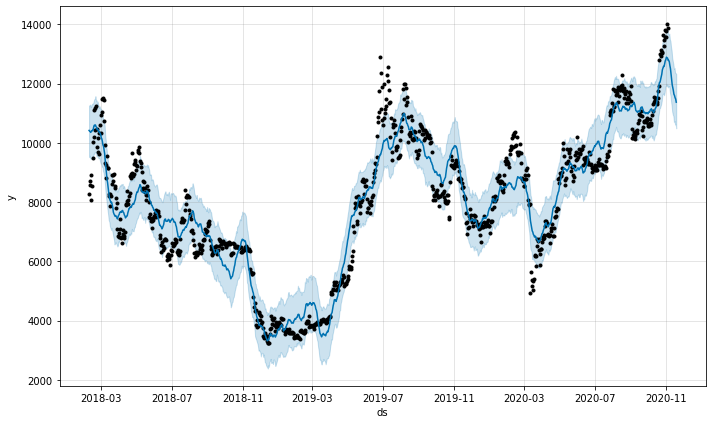

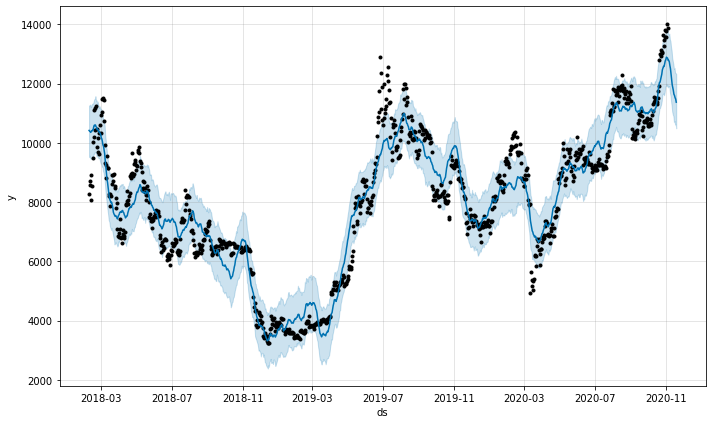

In [30]:
m.plot(prediction)

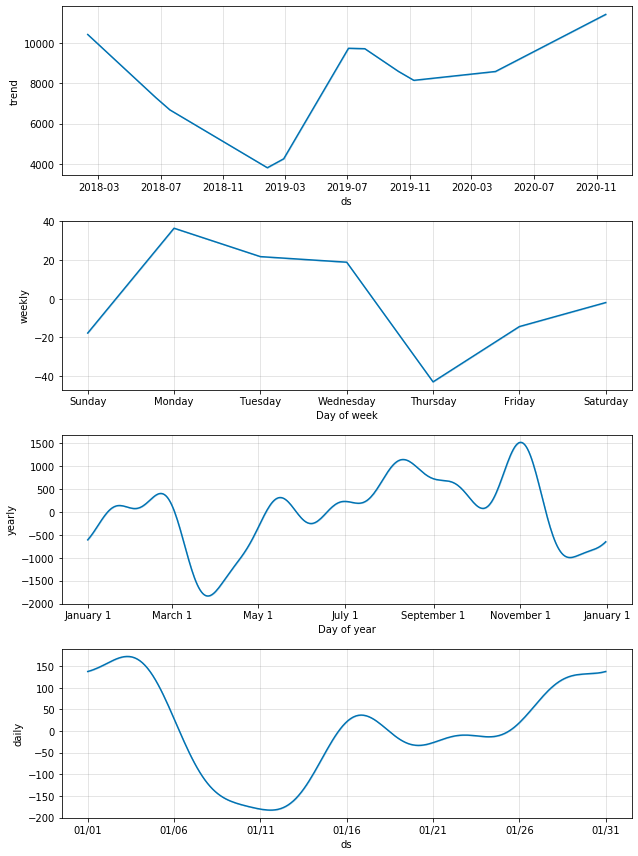

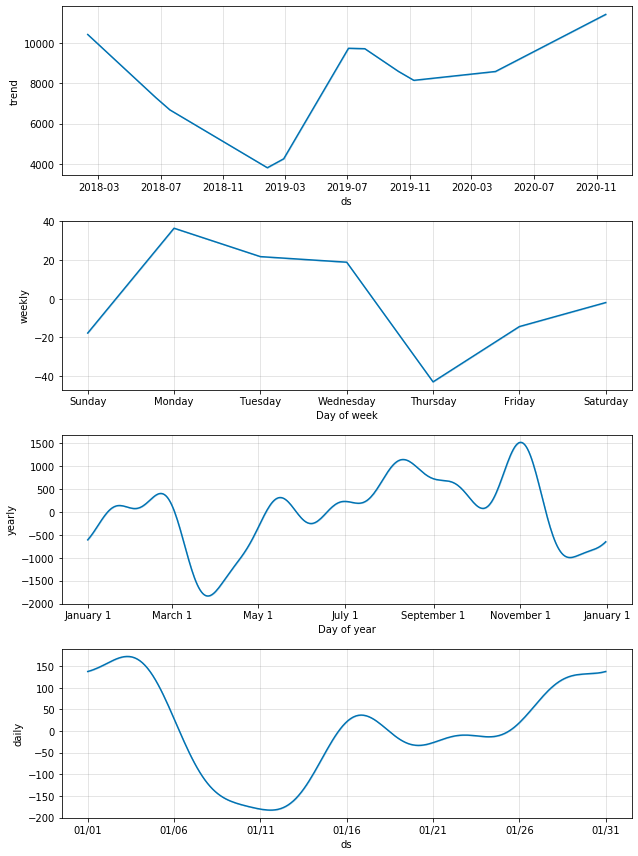

In [31]:
m.plot_components(prediction)

In [32]:
test

,time,close
801,2020-04-19,7132.88
802,2020-04-20,6842.45
803,2020-04-21,6855.11
804,2020-04-22,7135.41
805,2020-04-23,7489.25
...,...,...
996,2020-10-31,13803.41
997,2020-11-01,13761.72
998,2020-11-02,13571.24
999,2020-11-03,14023.78


In [34]:
test=test.set_index("time")

In [35]:
test

,close
time,
2020-04-19,7132.88
2020-04-20,6842.45
2020-04-21,6855.11
2020-04-22,7135.41
2020-04-23,7489.25
...,...
2020-10-31,13803.41
2020-11-01,13761.72
2020-11-02,13571.24


In [36]:
test=test["close"]

In [37]:
test

time
2020-04-19     7132.88
2020-04-20     6842.45
2020-04-21     6855.11
2020-04-22     7135.41
2020-04-23     7489.25
                ...   
2020-10-31    13803.41
2020-11-01    13761.72
2020-11-02    13571.24
2020-11-03    14023.78
2020-11-04    13861.25
Name: close, Length: 200, dtype: float64

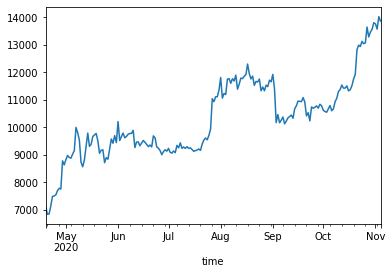

In [38]:
test.plot()

In [39]:
# find point/date for change

from fbprophet.plot import add_changepoints_to_plot

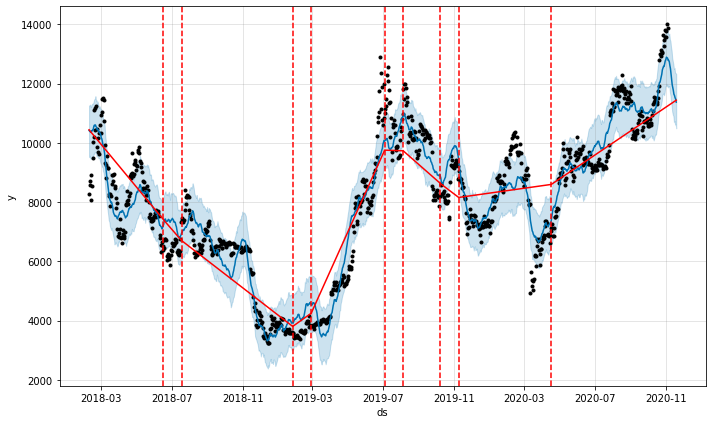

In [40]:
fig =m.plot(prediction)
c= add_changepoints_to_plot(fig.gca(),m,prediction)